<a href="https://colab.research.google.com/github/rocx320/MachineLearning/blob/main/irisDataset_09_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [10]:
data = pd.read_csv("Iris.csv")

In [11]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0  


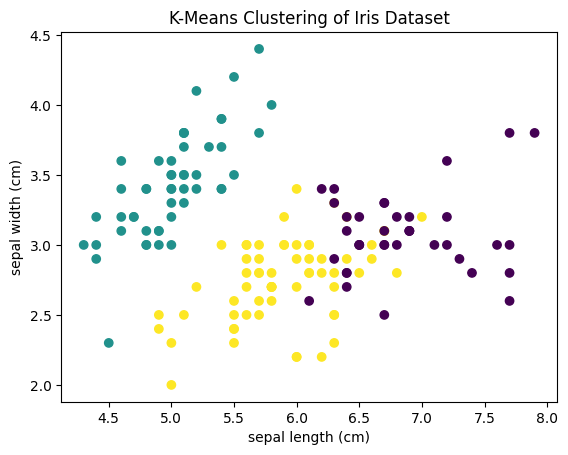

In [13]:
# Load the Iris dataset
iris = load_iris()
data = iris.data

# Choose the number of clusters (K)
num_clusters = 3

# Create a KMeans instance
kmeans = KMeans(n_clusters=num_clusters)

# Fit the KMeans model to the data
kmeans.fit(data)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the Iris dataset
iris_df = pd.DataFrame(data=np.c_[data, cluster_labels], columns=iris.feature_names + ['Cluster'])

# Print the first few rows of the data with cluster labels
print(iris_df.head())

# Visualize the clustered data (for the first two features)
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering of Iris Dataset')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For K = 2, Silhouette Score = 0.58
For K = 3, Silhouette Score = 0.46
For K = 4, Silhouette Score = 0.39
For K = 5, Silhouette Score = 0.34
For K = 6, Silhouette Score = 0.33
For K = 7, Silhouette Score = 0.32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


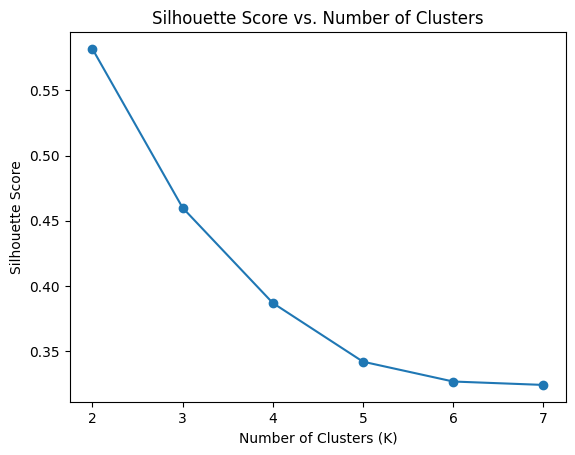

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Customizing K-Means
k_values = range(2, 8)  # Trying K values from 2 to 7
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For K = {k}, Silhouette Score = {silhouette_avg:.2f}")

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

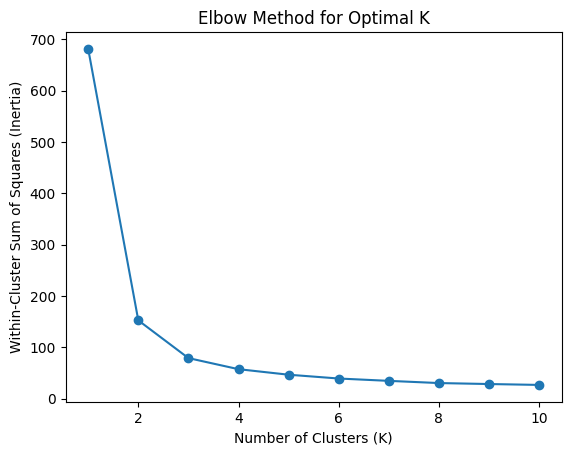

In [15]:
# Calculate within-cluster sum of squares (inertia) for different K values
inertia_values = []
k_values = range(1, 11)  # Trying K values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [16]:
# Load the Iris dataset
iris = load_iris()
data = iris.data

# Initialize KMeans instance
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get initial cluster centroids
initial_centroids = kmeans.cluster_centers_

# Print initial centroids
print("Initial Centroids:")
print(initial_centroids)

# Perform a few iterations to update centroids manually
updated_centroids = np.copy(initial_centroids)
for i in range(5):
    # Assign data points to clusters
    labels = kmeans.predict(data)

    # Update centroids
    for cluster_idx in range(k):
        cluster_data = data[labels == cluster_idx]
        if len(cluster_data) > 0:
            updated_centroids[cluster_idx] = np.mean(cluster_data, axis=0)

    print(f"\nCentroids after iteration {i + 1}:")
    print(updated_centroids)

Initial Centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Centroids after iteration 1:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Centroids after iteration 2:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Centroids after iteration 3:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Centroids after iteration 4:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Centroids after iteration 5:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.7

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


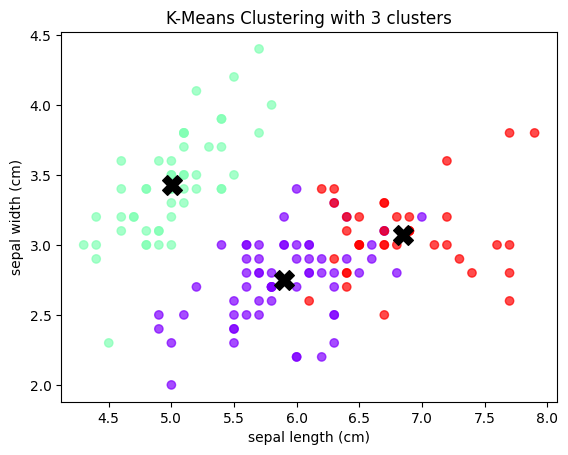

In [18]:
# Choose the number of clusters (K)
k = 3

# Initialize KMeans instance
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Visualize data points and centroids
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='rainbow', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f'K-Means Clustering with {k} clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


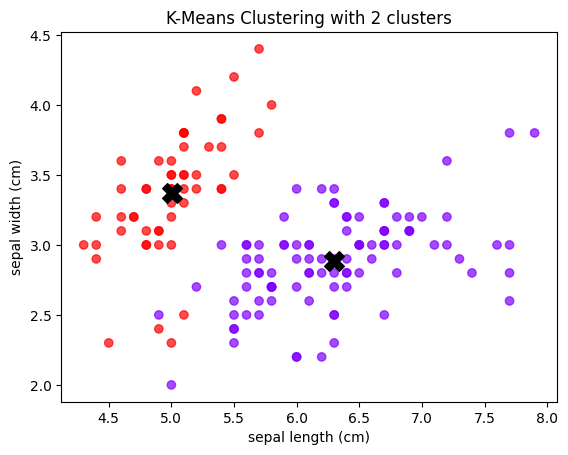

In [19]:
# Choose the number of clusters (K)
k = 2

# Initialize KMeans instance
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Visualize data points and centroids
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='rainbow', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f'K-Means Clustering with {k} clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


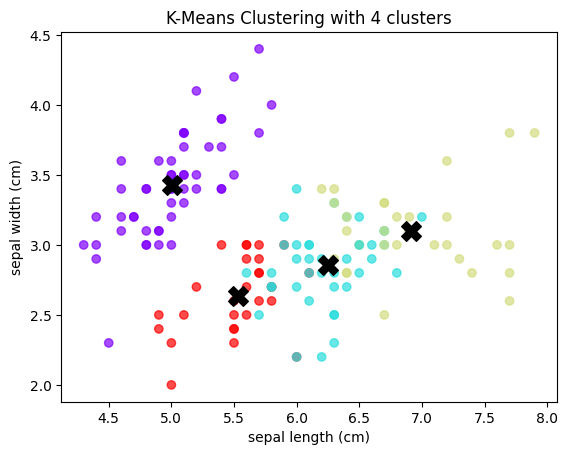

In [20]:
# Choose the number of clusters (K)
k = 4

# Initialize KMeans instance
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Visualize data points and centroids
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='rainbow', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f'K-Means Clustering with {k} clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


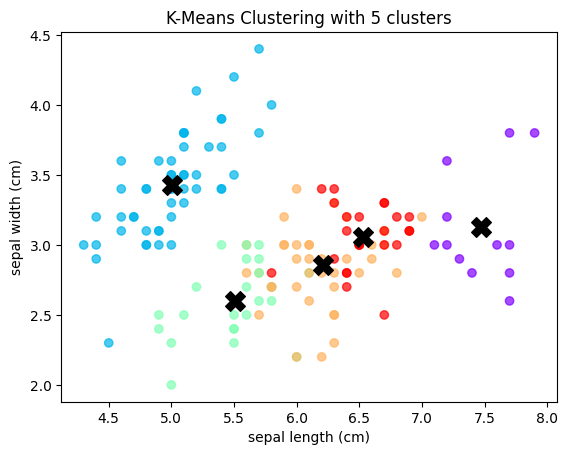

In [21]:
# Choose the number of clusters (K)
k = 5

# Initialize KMeans instance
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Visualize data points and centroids
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='rainbow', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f'K-Means Clustering with {k} clusters')
plt.show()

In [17]:
# Try different K values
k_values = [2, 3, 4, 5]

for k in k_values:
    print(f"\nK = {k}")
    # Initialize KMeans instance
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data
    kmeans.fit(data)

    # Get cluster centroids
    centroids = kmeans.cluster_centers_

    # Print centroids
    print("Centroids:")
    print(centroids)


K = 2
Centroids:
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]

K = 3
Centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

K = 4
Centroids:
[[5.006      3.428      1.462      0.246     ]
 [6.2525     2.855      4.815      1.625     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [5.53214286 2.63571429 3.96071429 1.22857143]]

K = 5
Centroids:
[[7.475      3.125      6.3        2.05      ]
 [5.006      3.428      1.462      0.246     ]
 [5.508      2.6        3.908      1.204     ]
 [6.20769231 2.85384615 4.74615385 1.56410256]
 [6.52916667 3.05833333 5.50833333 2.1625    ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
# Choose the number of clusters (K)
k = 3

# Try different random_state values
random_state_values = [42, 0, 99]

for random_state in random_state_values:
    print(f"\nRandom State = {random_state}")
    # Initialize KMeans instance
    kmeans = KMeans(n_clusters=k, random_state=random_state)

    # Fit the model to the data
    kmeans.fit(data)

    # Get cluster labels
    labels = kmeans.labels_

    # Print unique cluster labels
    print("Cluster Labels:", np.unique(labels))


Random State = 42
Cluster Labels: [0 1 2]

Random State = 0
Cluster Labels: [0 1 2]

Random State = 99
Cluster Labels: [0 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


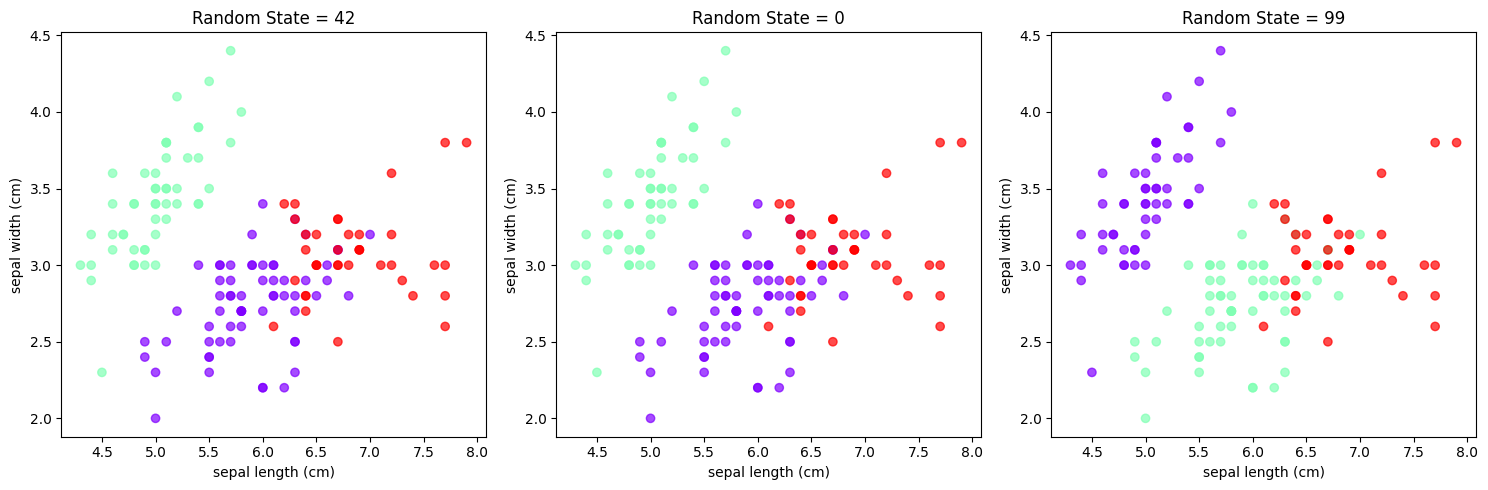

In [23]:
# Choose the number of clusters (K)
k = 3

# Try different random_state values
random_state_values = [42, 0, 99]

# Create subplots for each random_state value
plt.figure(figsize=(15, 5))
for i, random_state in enumerate(random_state_values, 1):
    # Initialize KMeans instance
    kmeans = KMeans(n_clusters=k, random_state=random_state)

    # Fit the model to the data
    kmeans.fit(data)

    # Get cluster labels
    labels = kmeans.labels_

    # Create subplot
    plt.subplot(1, len(random_state_values), i)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=0.7)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(f'Random State = {random_state}')

plt.tight_layout()
plt.show()